# 1. Install and import dependencies

In [2]:
#!pip install pycaret

In [3]:
import pandas as pd
from pycaret.classification import *

# 2. Load data

In [4]:
df = pd.read_csv('../bank-additional-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 3. Train and evaluate model

In [8]:
cat_features =[ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact',  'month', 'poutcome']

In [17]:
experiment =setup(df,target='y', categorical_features=cat_features, fix_imbalance=True)

,Description,Value
0,session_id,4921
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(41188, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9149,0.9483,0.5642,0.6403,0.5995,0.5521,0.5537,0.4770
catboost,CatBoost Classifier,0.9148,0.9471,0.5600,0.6420,0.5979,0.5505,0.5523,11.2760
xgboost,Extreme Gradient Boosting,0.9120,0.9443,0.5465,0.6273,0.5839,0.5350,0.5367,4.4150
gbc,Gradient Boosting Classifier,0.9103,0.9420,0.5903,0.6064,0.5980,0.5475,0.5477,4.5340
rf,Random Forest Classifier,0.9097,0.9379,0.4735,0.6357,0.5425,0.4937,0.5004,1.6210
ada,Ada Boost Classifier,0.9043,0.9287,0.5259,0.5858,0.5535,0.5002,0.5015,1.1170
et,Extra Trees Classifier,0.9025,0.9186,0.4158,0.5987,0.4903,0.4385,0.4476,2.2020
dummy,Dummy Classifier,0.8869,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0970
dt,Decision Tree Classifier,0.8855,0.7301,0.5293,0.4945,0.5111,0.4464,0.4468,0.2930
nb,Naive Bayes,0.8699,0.8149,0.4952,0.4343,0.4627,0.3891,0.3902,0.1070


# 4. Creating the model

In [19]:
model_lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9175,0.9508,0.5810,0.6529,0.6149,0.5688,0.5701
1,0.9081,0.9420,0.4939,0.6169,0.5486,0.4981,0.5019
2,0.9122,0.9468,0.5583,0.6254,0.5900,0.5410,0.5421
3,0.9154,0.9443,0.5736,0.6404,0.6052,0.5579,0.5590
4,0.9220,0.9543,0.6043,0.6724,0.6365,0.5929,0.5940
5,0.9105,0.9449,0.5092,0.6288,0.5627,0.5135,0.5170
6,0.9116,0.9458,0.5890,0.6134,0.6009,0.5512,0.5514
7,0.9136,0.9483,0.5583,0.6341,0.5938,0.5457,0.5471
8,0.9174,0.9536,0.5798,0.6517,0.6136,0.5676,0.5688


In [20]:
model_cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9154,0.9506,0.5566,0.6477,0.5987,0.5517,0.5537
1,0.9119,0.9429,0.5368,0.6295,0.5795,0.5306,0.5327
2,0.9126,0.9450,0.5399,0.6331,0.5828,0.5343,0.5364
3,0.9116,0.9424,0.5583,0.6212,0.5880,0.5387,0.5396
4,0.9122,0.9487,0.5767,0.6205,0.5978,0.5486,0.5491
5,0.9140,0.9447,0.5307,0.6455,0.5825,0.5351,0.5382
6,0.9126,0.9451,0.5767,0.6225,0.5987,0.5498,0.5503
7,0.9206,0.9488,0.5675,0.6777,0.6177,0.5738,0.5766
8,0.9150,0.9514,0.5767,0.6373,0.6055,0.5580,0.5589


In [21]:
model_gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9144,0.9463,0.6086,0.6258,0.6171,0.5689,0.5689
1,0.9057,0.9364,0.5307,0.5925,0.5599,0.5072,0.5082
2,0.9067,0.9374,0.5613,0.5922,0.5764,0.5240,0.5242
3,0.9116,0.9388,0.6012,0.6106,0.6059,0.5561,0.5561
4,0.9143,0.9493,0.6380,0.6172,0.6275,0.5791,0.5792
5,0.9057,0.9364,0.5736,0.5844,0.5789,0.5258,0.5259
6,0.9053,0.9397,0.6074,0.5773,0.5919,0.5384,0.5386
7,0.9098,0.9410,0.5767,0.6065,0.5912,0.5405,0.5408
8,0.9140,0.9463,0.6012,0.6242,0.6125,0.5641,0.5643


# Tuning the Model

In [13]:
import numpy as np



tuned_model = tune_model(model_lgb, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9189,0.9485,0.5586,0.6654,0.6074,0.5625,0.5652
1,0.9181,0.9551,0.5820,0.6505,0.6144,0.5687,0.5698
2,0.9116,0.9406,0.5480,0.6189,0.5813,0.5320,0.5333
3,0.9216,0.9531,0.5728,0.6777,0.6208,0.5774,0.5800
4,0.9178,0.9570,0.5851,0.6473,0.6146,0.5688,0.5697
5,0.9133,0.9473,0.5480,0.6299,0.5861,0.5379,0.5396
6,0.9195,0.9497,0.6068,0.6512,0.6282,0.5831,0.5836
7,0.9095,0.9392,0.5356,0.6092,0.5700,0.5197,0.5210
8,0.9174,0.9527,0.5480,0.6580,0.5980,0.5524,0.5553


In [22]:
# ensemble model
boosted_lgb = ensemble_model(model_lgb, method = 'Boosting', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.9439,0.5657,0.6293,0.5958,0.5472,0.5482
1,0.9109,0.9377,0.5276,0.6255,0.5724,0.5230,0.5254
2,0.9053,0.9394,0.5123,0.5943,0.5502,0.4977,0.4994
3,0.9067,0.9384,0.5429,0.5960,0.5682,0.5160,0.5167
4,0.9074,0.9453,0.5368,0.6014,0.5673,0.5156,0.5166
5,0.9057,0.9379,0.5000,0.5993,0.5452,0.4930,0.4955
6,0.9084,0.9405,0.5675,0.6006,0.5836,0.5322,0.5325
7,0.9119,0.9412,0.5337,0.6304,0.5781,0.5293,0.5316
8,0.9143,0.9493,0.5828,0.6312,0.6061,0.5581,0.5586


In [23]:
print(boosted_lgb)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4921, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# ensemble model
bagged_lgb = ensemble_model(model_lgb, method = 'Bagging', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9128,0.9380,0.5324,0.6567,0.5881,0.5399,0.5436
1,0.9008,0.9286,0.5108,0.5870,0.5462,0.4908,0.4923
2,0.9109,0.9338,0.5337,0.6450,0.5841,0.5347,0.5377
3,0.9049,0.9346,0.4852,0.6207,0.5446,0.4924,0.4971
4,0.9131,0.9428,0.5121,0.6690,0.5802,0.5326,0.5386
5,0.9090,0.9344,0.4447,0.6680,0.5340,0.4858,0.4982
6,0.9090,0.9369,0.4906,0.6477,0.5583,0.5086,0.5147
7,0.9080,0.9326,0.5135,0.6312,0.5663,0.5155,0.5189
8,0.9039,0.9317,0.5216,0.6031,0.5594,0.5058,0.5075


In [ ]:
print(bagged_lgb)

BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.1, max_depth=-1,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                num_leaves=31, objective=None,
                                                random_state=6082,
                                                reg_alpha=0.0, reg_lambda=0.0,
                                                silent='warn', subsample=1.0,
                                                s

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
# blend models
#  choose_better set to True, will always return a better performing model meaning that if blending the models doesn't improve the performance, it will return the single best performing input model.
blender = blend_models([bagged_lgb, model_cb, model_gbc], choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9131,0.9381,0.5432,0.6547,0.5938,0.5456,0.5486
1,0.8986,0.9264,0.4946,0.5773,0.5328,0.4762,0.4780
2,0.9090,0.9362,0.5337,0.6326,0.5789,0.5283,0.5307
3,0.9068,0.9343,0.4906,0.6319,0.5524,0.5013,0.5063
4,0.9115,0.9439,0.5202,0.6542,0.5796,0.5309,0.5352
5,0.9125,0.9321,0.4690,0.6850,0.5568,0.5101,0.5214
6,0.9081,0.9355,0.4906,0.6408,0.5557,0.5055,0.5111
7,0.9090,0.9327,0.5324,0.6314,0.5777,0.5271,0.5295
8,0.9064,0.9317,0.5324,0.6156,0.5710,0.5188,0.5205


In [ ]:
print(blender)

VotingClassifier(estimators=[('Bagging',
                              BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                              class_weight=None,
                                                                              colsample_bytree=1.0,
                                                                              importance_type='split',
                                                                              learning_rate=0.1,
                                                                              max_depth=-1,
                                                                              min_child_samples=20,
                                                                              min_child_weight=0.001,
                                                                              min_split_gain=0.0,
                                                                      

In [ ]:
# optimize threshold
optimized_lgb = optimize_threshold(bagged_lgb)

In [ ]:
print(optimized_lgb)

NameError: name 'optimized_lgb' is not defined

In [ ]:
# stack models
stacker = stack_models(compare_models(n_select = 3))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9049,0.9305,0.7216,0.5742,0.6395,0.5856,0.5906
1,0.8882,0.9166,0.6757,0.5165,0.5855,0.5222,0.5285
2,0.9033,0.9315,0.7305,0.5681,0.6392,0.5843,0.5905
3,0.9036,0.9263,0.7170,0.5708,0.6356,0.5809,0.5859
4,0.9084,0.9354,0.7035,0.5918,0.6429,0.5907,0.5937
5,0.9030,0.9179,0.6469,0.5769,0.6099,0.5547,0.5559
6,0.8995,0.9261,0.6981,0.5570,0.6196,0.5626,0.5673
7,0.8982,0.9290,0.6784,0.5529,0.6092,0.5514,0.5552
8,0.8976,0.9225,0.6973,0.5489,0.6143,0.5562,0.5615


No so much improvement of accuracy performance after stacking, but recall increases

# Making Predictions

In [ ]:
predictions = predict_model(model_cat)

predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9053,0.9350,0.4800,0.6192,0.5408,0.4889,0.4939


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y,Label,Score
0,27.0,691.0,6.0,357.0,12.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9453
1,23.0,1062.0,27.0,379.0,3.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,no,no,0.7496
2,39.0,401.0,17.0,396.0,1.0,129.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9274
3,40.0,340.0,29.0,146.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9979
4,41.0,4517.0,20.0,137.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9886
5,56.0,881.0,14.0,225.0,2.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9984
6,34.0,0.0,7.0,181.0,3.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9781
7,67.0,701.0,6.0,254.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,yes,no,0.6865
8,28.0,459.0,3.0,178.0,1.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9960
9,30.0,1.0,18.0,119.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9966


# Plotting the Model

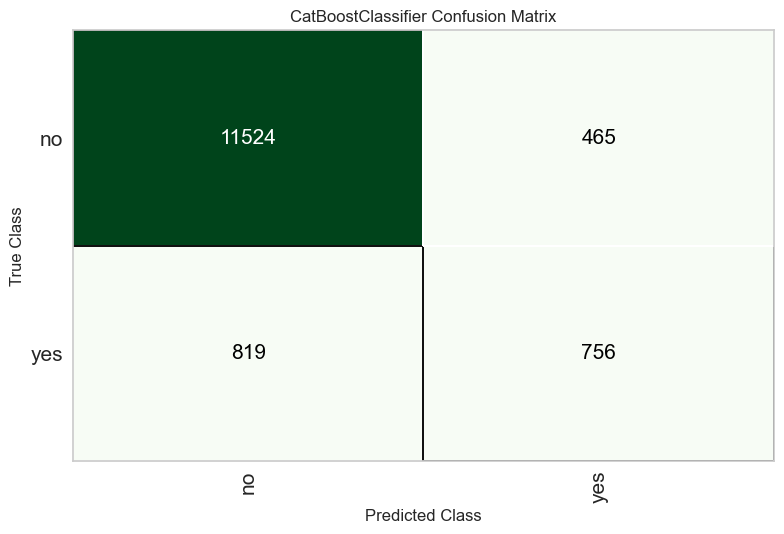

In [ ]:
plot_model(model_cat, 'confusion_matrix')

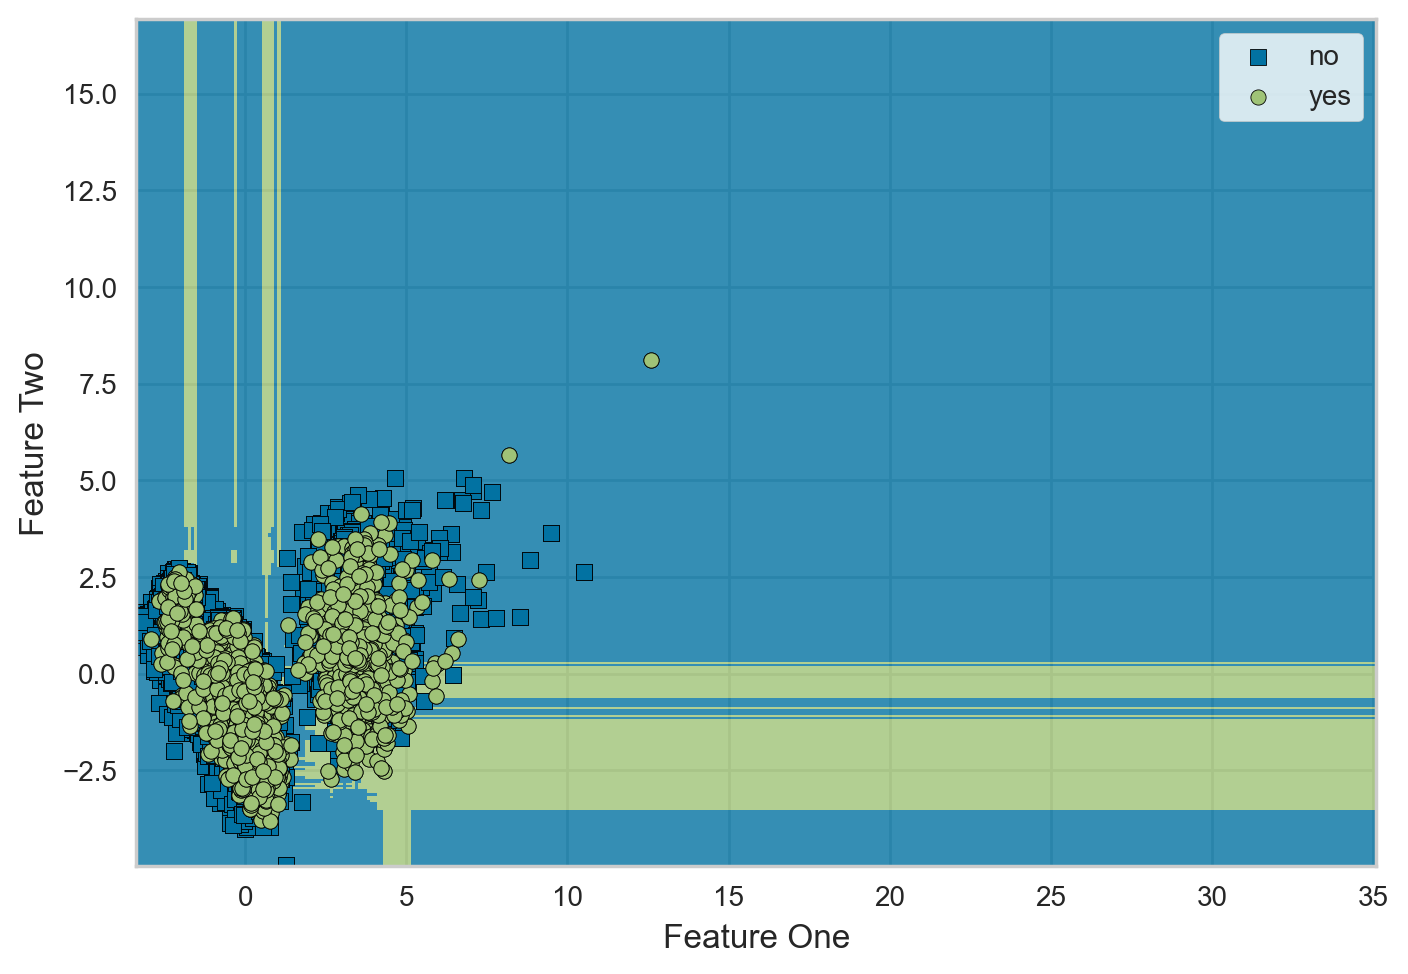

In [ ]:
plot_model(model_cat, 'boundary', scale = 2)

# Finalizing and Saving the Model


In [ ]:
final_model = finalize_model(model_cat)

save_model(final_model, 'catboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                             'education',
                                                             'default',
                                                             'housing', 'loan',
                                                             'contact', 'month',
                                                             'poutcome'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_...
                 ('binn', 'passthrough'), ('rem_outliers', 'pas

# Load saved model

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('../catboost_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                            'education',
                                                            'default',
                                                            'housing', 'loan',
                                                            'contact', 'month',
                                                            'poutcome'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
    